# Project Objective
- 감기, 눈병, 식중독, 천식, 피부염, 온열질환, 심뇌혈관 질환에 대한 예측 정보 
- → 전국 병원 정보와 연계하여 취약 지역 발굴 및 대책 방안 강구

# Data load
- Open API 활용
- 공공데이터포털에서 데이터 활용 신청 후 키 받아와서 데이터 로드
- 사용 데이터
    1. 국민건강보험공단 질병예측 정보 : https://www.data.go.kr/data/15028050/openapi.do#tab_layer_detail_function
    2. 건강보험심사평가원_병원정보서비스 : https://www.data.go.kr/data/15001698/openapi.do?recommendDataYn=Y

- API 활용 참고 사이트 https://jeong-pro.tistory.com/143
- xml 공식 문서 https://docs.python.org/ko/3/library/xml.etree.elementtree.html
- xml python으로 사용하기 https://ctkim.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-xml-%EB%AA%A8%EB%93%88

## 질병 예측 정보

- 입력 데이터

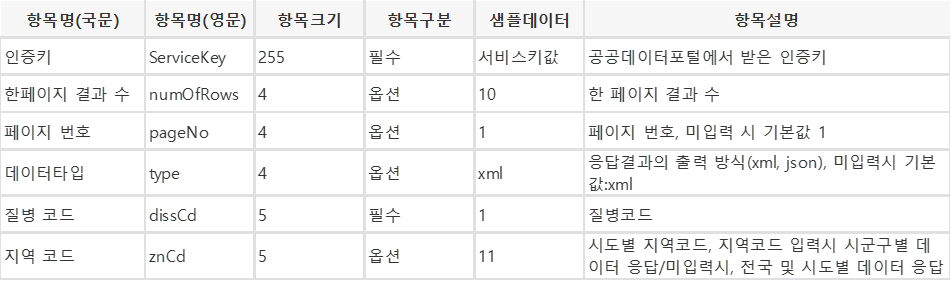

- 출력 데이터

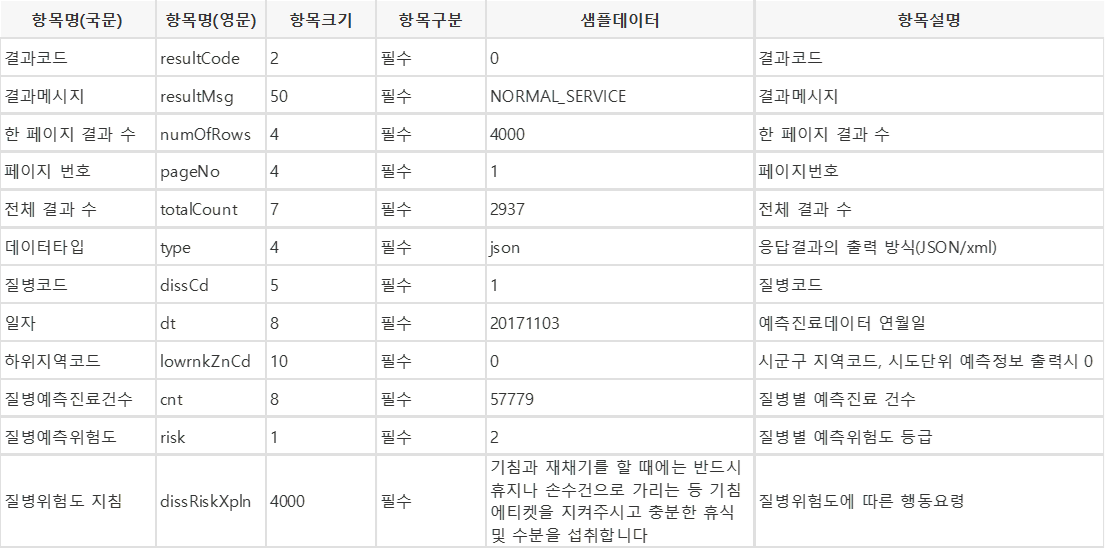

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import xml.etree.ElementTree as ET

### 데이터 구조 파악

In [100]:
# 질병예측 정보 데이터 로드
url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'
params ={'serviceKey' : 'NhaOA/SAb3I1X0tMz6nUV6D3I/CkEp0cDPoREmI1PbqUwpa48D9kmPUTtO8FrdYd2RuhmxxsNb9y+8vYg/OlTA==', 
         'numOfRows' : '1', 'pageNo' : '1', 'type' : 'xml', 'dissCd' : '1', 'znCd' : '11' }

response = requests.get(url, params=params)
root = ET.fromstring(response.content)
# print(response.content)

In [105]:
# root 구조 파악하기
for child in root:
    print(child.tag, child.text)
    for cont1 in child:
        print("   ", cont1.tag, cont1.text)
        for cont2 in cont1:
            print("\t", cont2.tag, cont2.text)
            for cont3 in cont2:
                print("\t   ", cont3.tag, cont3.text)
    print()

header None
    resultCode 0
    resultMsg NORMAL_SERVICE
    type xml

body None
    items None
	 item None
	    dissCd 1
	    dt 20240307
	    znCd 11
	    lowrnkZnCd 11110
	    cnt 1130
	    risk 2
	    dissRiskXpln 기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.
    totalCount 75
    numOfRows 1
    pageNo 1



In [4]:
# 코드표
dissCds = {1:"감기", 2:"눈병", 3:"식중독", 4:"피부염"}
znCds = {11:"서울", 26:"부산", 27:"대구", 28:"인천", 29:"광주", 30:"대전", 31:"울산",
       41:"경기", 42:"강원", 43:"충북", 44:"충남", 45:"전북", 46:"전남", 47:"경북", 48:"경남", 49:"제주", 99:"전국"}
riskCds = {1:"관심", 2:"주의", 3:"경고", 4:"위험"}

### 데이터프레임 생성

In [2]:
# 응답 받아오는 함수
def response(dissCd, znCd, rows=10, pg=1, tp='xml'):
    # 데이터 받아오기
    url = 'http://apis.data.go.kr/B550928/dissForecastInfoSvc/getDissForecastInfo'
    params ={'serviceKey' : 'NhaOA/SAb3I1X0tMz6nUV6D3I/CkEp0cDPoREmI1PbqUwpa48D9kmPUTtO8FrdYd2RuhmxxsNb9y+8vYg/OlTA==', 
             'numOfRows' : rows, 'pageNo' : pg, 'type' : tp, 'dissCd' : dissCd, 'znCd' : znCd}
    response = requests.get(url, params=params)
    root = ET.fromstring(response.content)
    
    # 필요 요소 저장하기
    totalCnt = root.find("body/totalCount")
    items = root.findall("body/items/item")
    
    return {"totalCount": totalCnt.text, "items": items}

In [3]:
# 각 item별 데이터 항목 추출 함수
def item_info(item):
    output = {}
    for elem in item:
        output[elem.tag] = elem.text
    return output

In [122]:
response(dissCd=1, znCd=11, rows=100)

{'totalCount': '75',
 'items': [<Element 'item' at 0x00000197E891BAE0>,
  <Element 'item' at 0x00000197E891B270>,
  <Element 'item' at 0x00000197E891BB80>]}

In [121]:
for item in response(dissCd=1, znCd=11, rows=3)["items"]:
    print(item_info(item))

{'dissCd': '1', 'dt': '20240307', 'znCd': '11', 'lowrnkZnCd': '11110', 'cnt': '1130', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '11', 'lowrnkZnCd': '11140', 'cnt': '922', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '11', 'lowrnkZnCd': '11170', 'cnt': '1696', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}


In [91]:
print(root.find("body/totalCount").text)

items = root.findall("body/items/item")
print(len(items))

for item in items:
    print(item_info(item))

51
10
{'dissCd': '1', 'dt': '20240307', 'znCd': '11', 'lowrnkZnCd': '0', 'cnt': '72759', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '26', 'lowrnkZnCd': '0', 'cnt': '28520', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '27', 'lowrnkZnCd': '0', 'cnt': '18684', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '28', 'lowrnkZnCd': '0', 'cnt': '19845', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '29', 'lowrnkZnCd': '0', 'cnt': '11926', 'risk': '2', 'dissRiskXpln': '기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주시고 충분한 휴식 및 수분을 섭취합니다.'}
{'dissCd': '1', 'dt': '20240307', 'znCd': '30', 'lowrnkZnCd': '0', 'cnt': 

In [167]:
# 질병코드별 데이터 프레임 생성

diss1_tcnt = {}
df_1 = pd.DataFrame()

for zncd in list(znCds.keys())[:-1]:  # znCd = 99 일때 에러 발생해서 제외함
    res = response(rows=100, dissCd=1, znCd=zncd)
    diss1_tcnt["zncd"] = res["totalCount"]
    
    a = [item_info(item) for item in res["items"]]
    df_1 = pd.concat([df_1, pd.DataFrame(a)])

df_1.reset_index(drop=True, inplace=True)
df_1

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240307,11,11110,1130,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,20240307,11,11140,922,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,1,20240307,11,11170,1696,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,1,20240307,11,11200,2129,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,1,20240307,11,11215,2661,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...
719,1,20240307,49,49130,1159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
720,1,20240308,49,49110,3469,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
721,1,20240308,49,49130,1076,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
722,1,20240309,49,49110,3159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


In [171]:
def make_df(dissCd):
    diss1_tcnt = {}
    df = pd.DataFrame()

    for zncd in list(znCds.keys())[:-1]:  # znCd = 99 일때 에러 발생해서 제외함
        res = response(rows=100, dissCd=dissCd, znCd=zncd)
        diss1_tcnt["zncd"] = res["totalCount"]

        a = [item_info(item) for item in res["items"]]
        df = pd.concat([df, pd.DataFrame(a)])
        
    df.reset_index(drop=True, inplace=True)
    return df

In [175]:
df1 = make_df(1)
df2 = make_df(2)
df3 = make_df(3)
df4 = make_df(4)

df1.shape, df2.shape, df3.shape, df4.shape

((724, 7), (724, 7), (724, 7), (724, 7))

In [176]:
df1.to_csv("./data/Healthcare Facilities/df1.csv")
df2.to_csv("./data/Healthcare Facilities/df2.csv")
df3.to_csv("./data/Healthcare Facilities/df3.csv")
df4.to_csv("./data/Healthcare Facilities/df4.csv")

In [180]:
pd.read_csv("./data/Healthcare Facilities/df1.csv")

,Unnamed: 0,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,0,1,20240307,11,11110,1130,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,1,20240307,11,11140,922,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,2,1,20240307,11,11170,1696,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,3,1,20240307,11,11200,2129,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,4,1,20240307,11,11215,2661,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...,...
719,719,1,20240307,49,49130,1159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
720,720,1,20240308,49,49110,3469,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
721,721,1,20240308,49,49130,1076,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
722,722,1,20240309,49,49110,3159,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...


### 240309

In [5]:
# 질병코드별 데이터 프레임 생성

diss1_tcnt = {}
df_1 = pd.DataFrame()

for zncd in list(znCds.keys())[:-1]:  # znCd = 99 일때 에러 발생해서 제외함
    res = response(rows=100, dissCd=1, znCd=zncd)
    diss1_tcnt["zncd"] = res["totalCount"]
    
    a = [item_info(item) for item in res["items"]]
    df_1 = pd.concat([df_1, pd.DataFrame(a)])

df_1.reset_index(drop=True, inplace=True)
df_1

,dissCd,dt,znCd,lowrnkZnCd,cnt,risk,dissRiskXpln
0,1,20240309,11,11110,1046,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
1,1,20240309,11,11140,853,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
2,1,20240309,11,11170,1600,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
3,1,20240309,11,11200,2008,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
4,1,20240309,11,11215,2464,2,기침과 재채기를 할 때에는 반드시 휴지나 손수건으로 가리는 등 기침 에티켓을 지켜주...
...,...,...,...,...,...,...,...
719,1,20240309,49,49130,1017,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
720,1,20240310,49,49110,1639,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
721,1,20240310,49,49130,431,1,"환기를 자주 시켜 깨끗한 환경을 유지하고, 외출 후에는 반드시 손을 씻는 등 평소 ..."
722,1,20240311,49,49110,5140,3,발열이나 호흡기 증상이 있다면 외출을 삼가되 외출시에는 마스크를 착용하고 가까운 의...


In [11]:
df_1.groupby("dt")["risk"].value_counts()

dt        risk
20240309  2       212
          1        24
          3        14
20240310  1       250
20240311  3       159
          4        65
Name: risk, dtype: int64

In [12]:
df_1["dt"].value_counts()

20240309    250
20240310    250
20240311    224
Name: dt, dtype: int64

<AxesSubplot:xlabel='znCd', ylabel='count'>

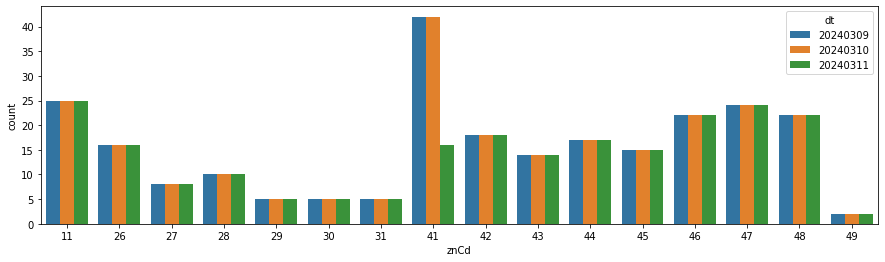

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_1, x="znCd", hue="dt")

- 41지역(경기)의 2일 뒤 예측 정보 없음

<AxesSubplot:xlabel='lowrnkZnCd', ylabel='count'>

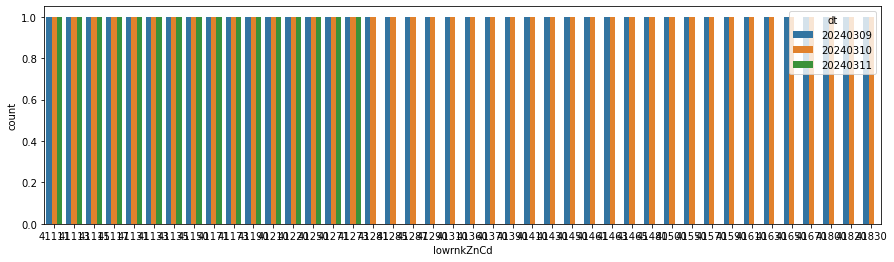

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_1[df_1["znCd"]=="41"], x="lowrnkZnCd", hue="dt")

In [40]:
# 2일 뒤 예측 정보 없는 지역 리스트
zn_41 = df_1[df_1["znCd"]=="41"]["lowrnkZnCd"].unique()
zn_notnull = df_1[(df_1["znCd"]=="41")&(df_1["dt"]=="20240311")]["lowrnkZnCd"].unique()
zn_null = [x for x in zn_41 if x not in zn_notnull]
print(f"{len(zn_null)}\n{zn_null}")

26
['41281', '41285', '41287', '41290', '41310', '41360', '41370', '41390', '41410', '41430', '41450', '41461', '41463', '41465', '41480', '41500', '41550', '41570', '41590', '41610', '41630', '41650', '41670', '41800', '41820', '41830']


## 병원 정보